<a href="https://colab.research.google.com/github/DeeeTeeee/Vodafone-Corporation---Classification-ML-Project/blob/master/lp3_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install imblearn
#!pip install -U imbalanced-learn

In [3]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from sklearn.metrics import confusion_matrix

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Other packages
from tabulate import tabulate
import os, pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
# #path = "C:\Users\acer\Downloads\Telco-Customer-Churn.csv"
# voda = pd.read_csv(r'C:\Users\acer\Downloads\Telco-Customer-Churn.csv')
# voda.sample(5)

#cus_data = pd.read_csv('Telco-Customer-Churn.csv')
path = '/content/Telco-Customer-Churn.csv'


voda = pd.read_csv(path)
voda.sample(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2103,7206-PQBBZ,Male,1,Yes,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,834.7,No
6538,5712-PTIWW,Male,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,79.85,152.45,Yes
530,8067-NIOYM,Female,0,Yes,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),21.10,490.65,No
2850,2277-DJJDL,Male,1,Yes,No,60,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,6017.9,No
2465,1740-CSDJP,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),35.25,35.25,Yes
6381,0927-CNGRH,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
2847,6985-HAYWX,Female,0,Yes,No,26,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),79.30,2015.8,No
5355,4724-WXVWF,Male,0,No,No,48,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,95.40,4445.3,No
1173,0107-WESLM,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.85,19.85,Yes
3844,3594-UVONA,Female,0,No,No,35,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),85.95,3110.1,Yes


This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No)

## **Questions:**
### 1. What is the most preferred internet service of customers?
### 2. Understand customer demographics with respect to gender?
### 3. Which service is most popular with customers?
### 4. Are customers without dependents likely to have higher charges than those with dependent?


## **Hypothesis**

#### **Null Hypothesis** : Customers on DSL are not likely churn  than those on Fiber internet service
#### **Alternate Hypothesis** : Customers on DSL are likely to churn than those on Fiber internet service

In [5]:
voda.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
voda.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
voda.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [8]:
import plotly.express as px

churn_counts = voda['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig = px.bar(churn_counts, x='Count', y='Churn', orientation='h', 
             color='Churn', text='Count', title="Count of TARGET Variable per category",
             color_discrete_sequence=['#1f77b4', '#aec7e8'])

fig.update_layout(xaxis_title="Count", yaxis_title="Target Variable",
                  yaxis=dict(categoryorder='total ascending'), 
                  margin=dict(l=100, r=20, t=50, b=50), height=400, showlegend=False)

fig.show()

In [9]:
100*voda['Churn'].value_counts()/len(voda['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
voda['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

 -  Data is highly imbalanced, ratio = 73:27
 
So we analyse the data with other features while taking the target values separately to get some insights

In [11]:
voda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
import plotly.express as px

missing = pd.DataFrame((voda.isnull().sum())*100/voda.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage Missing']

fig = px.line(missing, x='Feature', y='Percentage Missing', title="Percentage of Missing Values")
fig.update_layout(xaxis_title="Feature", yaxis_title="Percentage Missing")
fig.show()

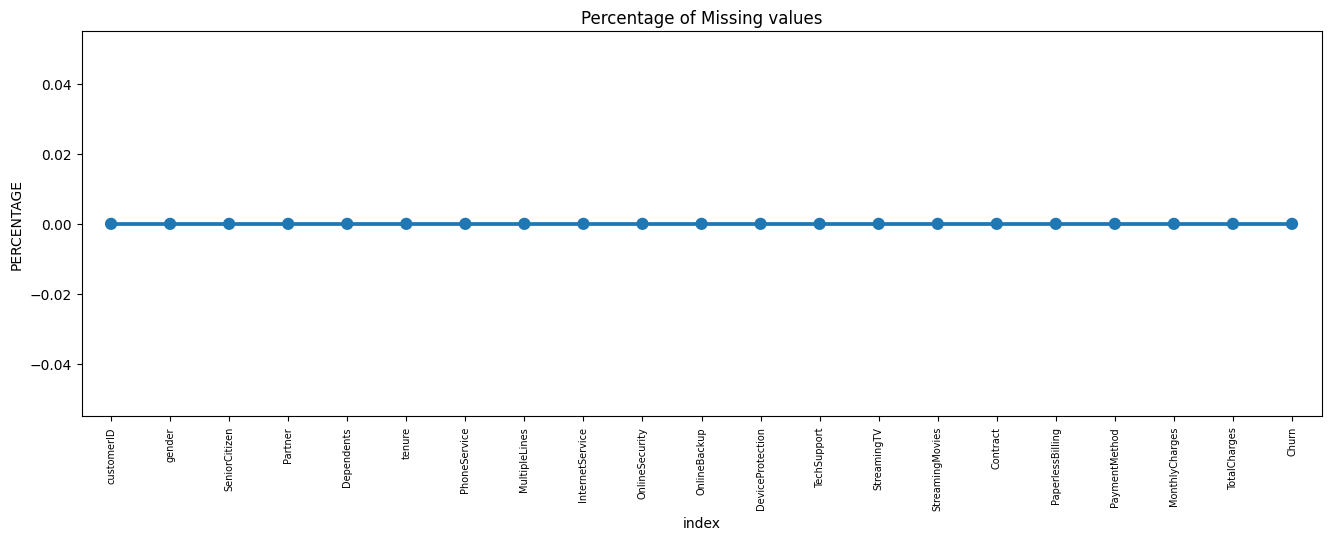

In [13]:
missing = pd.DataFrame((voda.isnull().sum())*100/voda.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Data Cleaning

1. Create a copy of base data for manupulation & processing

In [14]:
data = voda.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [15]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [16]:
data.loc[data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%,we however have chosen to fill the cells with 0s.

In [17]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)
#Fillin with 0s

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [18]:
# Get the max tenure
print(data['tenure'].max()) 

72


In [19]:
# # Group the tenure in bins of 12 months
# Create new bin labels
labels = ["1-12", "13-24", "25-36","37-48", "49-60", "61-72"]

# Group tenure into new bins and update column
data['tenure_group'] = pd.cut(data.tenure, [1, 13, 25, 37, 49, 61, 73], right=False, labels=labels)

# Count values in new bins and sort by index
tenure_counts = data['tenure_group'].value_counts().sort_index()

# Print sorted counts
print(tenure_counts)


1-12     2175
13-24    1024
25-36     832
37-48     762
49-60     832
61-72    1407
Name: tenure_group, dtype: int64


6. Remove columns not required for processing

In [20]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration
1. Plot distibution of individual predictors by churn

## Univariate Analysis

In [21]:

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(data, x=predictor, color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()


In [22]:

# # loop through all columns except 'Churn', 'TotalCharges', and 'MonthlyCharges'
# for col in data.columns:
#     if col not in ['Churn', 'TotalCharges', 'MonthlyCharges']:
#         # create a bar chart with counts of each category and color by churn
#         fig = px.histogram(data, x=col, color='Churn', barmode='group', title=col)
#         fig.update_layout(
#             xaxis_title=col,
#             yaxis_title='Count',
#             font=dict(size=12),
#             margin=dict(l=50, r=50, t=50, b=50),
#             showlegend=True,
#             legend=dict(title='Churn', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
#         )
#         fig.update_traces(opacity=0.75)
#         fig.show()


2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [23]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


3. Convert all the categorical variables into dummy variables

9. Relationship between Monthly Charges and Total Charges

##### Senior citizens and the tendecy to the customer churn

Null Hypothesis : Senior citizen does not correlate with the tendency of customer churn.<br>
Alternate Hypothesis : Senior citizen correlate with the tendency of customer churn.

In [24]:
from scipy.stats import chi2_contingency
Crosstabresults = pd.crosstab(index= voda['SeniorCitizen'], columns = voda['Churn'])
chisqresult  = chi2_contingency(Crosstabresults)

In [25]:
print('p-value: ', chisqresult[1])

p-value:  1.510066805092378e-36


Insights:<br>
P-value is less than 0.05, which implies that we reject our null hypothesis. Senior citizen correlates with the customer churn.

##### Gender and the tendency to customer churn 

In [26]:
Crosstabresults1 = pd.crosstab(index= voda['gender'], columns = voda['Churn'])
chisqresult1  = chi2_contingency(Crosstabresults1)

In [27]:
chisqresult1[1]

0.48657873605618596

Insights:<br>
P-value is greater than 0.05, which implies that we accept our null hypothesis. Senior citizen correlates with the customer churn.

##Questions

### 1. What is the most preferred internet service of customers?


In [28]:
#Aggregating count of customers over the internet service columns
inter_serv = voda.groupby('InternetService')['customerID'].count().reset_index()
inter_serv.rename(columns={'customerID':'Number'}, inplace =True)
inter_serv

,InternetService,Number
0,DSL,2421
1,Fiber optic,3096
2,No,1526


In [29]:
import plotly.graph_objs as go

data_inter_serv = inter_serv['Number']
keys = inter_serv['InternetService']
colors = px.colors.qualitative.Set1
explode = [0, 0.09, 0]

fig = go.Figure(data=[go.Pie(labels=keys, values=data_inter_serv, pull=[0.1, 0, 0], 
                             textinfo='label+percent', marker=dict(colors=colors))])
fig.update_layout(title='Customer Internet Preference')
fig.show()

In [30]:
import plotly.express as px

data_inter_serv = inter_serv['Number']
keys = inter_serv['InternetService']

fig = px.pie(values=data_inter_serv, names=keys, title='Customer Internet Preference', 
             color_discrete_sequence=px.colors.sequential.Blues, 
             labels={'value': 'Number'})

fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.1, 0.1, 0])

fig.show()

### 2. Understand customer demographics with respect to gender

In [31]:
#Splitting Data into customer demographic columns
cus_demo = voda.loc[:,'customerID':'Dependents']
cus_demo.rename(columns = {'customerID': 'Number'},inplace = True)
cus_demo

,Number,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [32]:
#Aggregate number of customers over demographic columns: Senior Citizen, Partner and Dependents
cus_demo1 = cus_demo.groupby(['SeniorCitizen','gender'])['Number'].count().reset_index()
cus_demo2 = cus_demo.groupby(['Partner', 'gender'])['Number'].count().reset_index()
cus_demo3 = cus_demo.groupby(['Dependents', 'gender'])['Number'].count().reset_index()

In [33]:
import plotly.express as px

fig1 = px.bar(cus_demo1, x='SeniorCitizen', y='Number', color='gender', barmode='group',
              category_orders={'SeniorCitizen': [0, 1]}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig2 = px.bar(cus_demo2, x='Partner', y='Number', color='gender', barmode='group',
              category_orders={'Partner': ['Yes', 'No']}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig3 = px.bar(cus_demo3, x='Dependents', y='Number', color='gender', barmode='group',
              category_orders={'Dependents': ['Yes', 'No']}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig1.update_layout(title='Customer Demographics', xaxis_title='Senior Citizen', yaxis_title='Number')
fig2.update_layout(xaxis_title='Partner', yaxis_title='Number')
fig3.update_layout(xaxis_title='Dependents', yaxis_title='Number')

fig1.show()
fig2.show()
fig3.show()

Insights:
* Majority of  customers are not senior citizens. That is , the client base is largely young people.
* Majority of the customers are not married. 
* Majority of the customers do not have dependents.

### 3. Which service is most popular with customers?

In [34]:
#slicing vodafone services from the original data
cus_serv = data.loc[:,'PhoneService':'StreamingMovies']

#Aggregating the count over the columns
serv_tally = cus_serv[cus_serv[['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes'].count()

In [35]:
serv_tally['InternetService'] = inter_serv['Number'].loc[0:1].sum()

In [36]:
import plotly.graph_objects as go

# Sorting in ascending order
serv_tally.sort_values(ascending=True, inplace=True)

# Creating a horizontal bar chart
fig = go.Figure(go.Bar(
    x=serv_tally.values,
    y=serv_tally.index,
    orientation='h',
    marker_color='blue' # Setting color of the bars to blue
))

fig.update_layout(title='Most Popular Service', xaxis_title='Number of Customers')
fig.show()

### 4. Are customers without dependents likely to have higher charges than those with dependent?

In [37]:
import plotly.express as px

fig = px.box(data_frame=data, x='Dependents', y='MonthlyCharges', color='Dependents',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.update_layout(title='Monthly Charges by Dependents',
                  xaxis_title='Dependents', yaxis_title='Monthly Charges')
fig.show()

In [38]:
import plotly.express as px

fig = px.box(data_frame=data, x='Dependents', y='TotalCharges', color='Dependents',
             category_orders={'Dependents': ['No', 'Yes']},
             color_discrete_sequence=['#1f77b4', '#aec7e8'])
fig.update_layout(title='Distribution of Total Charges by Dependents Status',
                  xaxis_title='Dependents', yaxis_title='Total Charges')
fig.show()

In [39]:
fig = px.scatter(data_frame=data, x='MonthlyCharges', y='TotalCharges', 
                 trendline='ols', color='Churn', title='Monthly Charges vs Total Charges')

fig.update_layout(xaxis_title='Monthly Charges', yaxis_title='Total Charges',
                  margin=dict(l=50, r=50, t=50, b=50), height=400)

fig.show()

3. Convert all the categorical variables into dummy variables

In [40]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Total Charges increase as Monthly Charges increase - as expected.

10. Churn by Monthly Charges and Total Charges

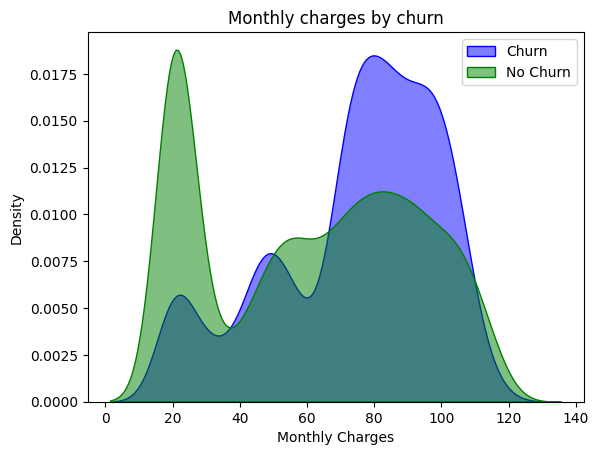

In [41]:
Mth_Chgs = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()

Insight: Churn is high when Monthly Charges are high

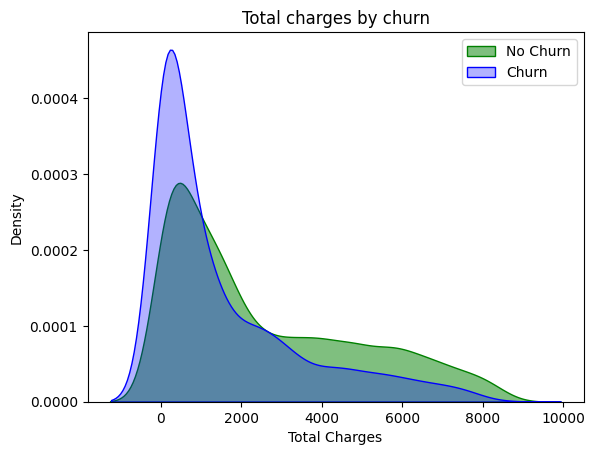

In [42]:
tot_Chgs = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Green", fill=True, alpha=.5)
tot_Chgs = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =tot_Chgs, color="Blue", fill=True, alpha=.3)
tot_Chgs.legend(["No Churn","Churn"],loc='upper right')
tot_Chgs.set_ylabel('Density')
tot_Chgs.set_xlabel('Total Charges')
tot_Chgs.set_title('Total charges by churn');


Higher Churn at lower Total Charges

But if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher** Monthly Charge, **Lower** tenure and **Lower** Total Charge are linkd to **High Churn**

11. Build a corelation of all predictors with 'Churn'

In [43]:
import plotly.express as px

corr = data_dummies.corr()['Churn'].sort_values(ascending=False).reset_index()
corr.columns = ['Feature', 'Correlation']

fig = px.bar(corr, x='Feature', y='Correlation', color='Correlation', 
             color_continuous_scale='OrRd', title='Correlation with Churn')
fig.update_layout(width=1200, height=750)
fig.show()

Derived Insight:

**HIGH** Churn seen in case of **Month to month contracts**, **No online security, No Tech support, First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**



Lets see it better in the Heatmap below:

### Bivariate Analysis

In [44]:
target_0= data.loc[data["Churn"]==0]
target_1= data.loc[data["Churn"]==1]

In [45]:
def uniplot(df, col, title, hue=None):
    fig = px.histogram(df, x=col, color=hue, barmode='group', 
                       category_orders={col: df[col].value_counts().index}, 
                       color_discrete_sequence=['#1f77b4', '#aec7e8'])
    fig.update_layout(title=title, xaxis_title=col, yaxis_title='Count', legend_title=hue)
    fig.show()

uniplot(target_1, col='Partner', title='Distribution of Partners in respect to Customer Churning', hue='gender')

In [46]:
def uniplot(df, col, title, hue=None):
    fig = px.histogram(df, x=col, color=hue, barmode='group',
                       category_orders={col: sorted(df[col].unique())},
                       color_discrete_sequence=['#1f77b4', '#aec7e8'])
    fig.update_layout(title=title, xaxis_title=col, yaxis_title='Count')
    fig.show()

uniplot(target_0, col='Partner', title='Distribution of Partners in respect to Customer Not Churned', hue='gender')

In [47]:
uniplot(target_1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [48]:
uniplot(target_1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [49]:
uniplot(target_1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [50]:
uniplot(target_1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

**CONCLUSION**
These are some of the quick insights from this exercise:

  - Electronic check medium are the highest churners
  - Contract Type - Monthly customers are more likely to churn this might be because of no contract terms.
  - No Online security, No Tech Support category are high churners
  - Non senior Citizens are high churners


In [52]:
data_dummies.to_csv('data_churn.csv')

### Reading csv

In [53]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [54]:
df=pd.read_csv("data_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [55]:
df=df.drop('Unnamed: 0',axis=1)

In [56]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [57]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Features Scaling

In [58]:

# initialize MinMaxScaler object with specified parameters
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# select numerical columns to scale
num_cols = x.select_dtypes(include='number').columns

# scale numerical columns using MinMaxScaler
x[num_cols] = scaler.fit_transform(x[num_cols])

In [59]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0.0,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.662189,0.229194,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7039,0.0,0.845274,0.847792,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7040,0.0,0.112935,0.039892,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7041,1.0,0.558706,0.035303,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### 1. Decision Tree Classifier

In [61]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [62]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [63]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [64]:
model_dt.score(x_test,y_test)

0.7849538679914834

In [65]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1030
           1       0.64      0.47      0.54       379

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model..

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.




### Balancing Dataset

In [66]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [67]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [68]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [69]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9440894568690096
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       523
           1       0.94      0.96      0.95       729

    accuracy                           0.94      1252
   macro avg       0.94      0.94      0.94      1252
weighted avg       0.94      0.94      0.94      1252



In [70]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[479  44]
 [ 26 703]]


Now we can see quite better results, i.e. Accuracy: 93%, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

###2. Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [73]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [74]:
y_pred=model_rf.predict(x_test)

In [75]:
model_rf.score(x_test,y_test)

0.794889992902768

In [76]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1030
           1       0.68      0.45      0.54       379

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Good enough, however lets check with the balance dataset

In [77]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [78]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [79]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [80]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [81]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [82]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [83]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9384372533543804
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       534
           1       0.94      0.96      0.95       733

    accuracy                           0.94      1267
   macro avg       0.94      0.93      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [84]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[486  48]
 [ 30 703]]


With Random Forest Classifier, also we are able to get better results, infact better than Decision Tree. 🥰

###3. Gradient Boosting Classifier Model


In [85]:
# Create a Gradient Boosting model
#model_gd=GradientBoostingClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8)

In [87]:
model_gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [88]:
y_pred = model_gb.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [89]:
model_gb.score(x_test,y_test)

0.7920511000709723

In [90]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1030
           1       0.64      0.52      0.57       379

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



let us use the balanced dataset and see

In [91]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x,y)

In [92]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [93]:
model_gb_smote = GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8)

In [94]:
model_gb_smote.fit(xr_train2,yr_train2)
yr_predict2 = model_gb_smote.predict(xr_test2)
model_score_r2 = model_gb_smote.score(xr_test2, yr_test2)
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))

0.9633466135458167
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       515
           1       0.96      0.97      0.97       740

    accuracy                           0.96      1255
   macro avg       0.96      0.96      0.96      1255
weighted avg       0.96      0.96      0.96      1255



In [95]:
print(metrics.confusion_matrix(yr_test2, yr_predict2))

[[488  27]
 [ 19 721]]


Yes, a far better result with the Gradient Boosting Model on the balanced dataset.. we can still check for more classifiers

###4. Logistic Regression 

In [96]:
# Create a Logistic Regression model
model_lr = LogisticRegression(C=1.0, random_state=101)

In [97]:
# Fit the logistic regression model to the training data
model_lr.fit(x_train, y_train)

LogisticRegression(random_state=101)

In [98]:
# Make predictions on the test data using the fitted model
pred_lr = model_lr.predict(x_test)

In [99]:
model_lr.score(x_test, y_test)

0.7934705464868701

In [100]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1030
           1       0.64      0.52      0.57       379

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



lets use the balanced data for this too

In [101]:
sm = SMOTEENN()
X_resampled3, y_resampled3 = sm.fit_resample(x,y)

In [102]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled3, y_resampled3,test_size=0.2)

In [103]:
model_lr_smote = LogisticRegression(C=1.0, random_state=101)

In [104]:
model_lr_smote.fit(xr_train3,yr_train3)
yr_predict3 = model_lr_smote.predict(xr_test3)
model_score_r3 = model_lr_smote.score(xr_test3, yr_test3)
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))

0.910174880763116
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       514
           1       0.91      0.94      0.92       744

    accuracy                           0.91      1258
   macro avg       0.91      0.90      0.91      1258
weighted avg       0.91      0.91      0.91      1258



In [105]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[449  65]
 [ 48 696]]


we can see this also is far better: Now that we now the balanced data is better in results, we will check some other Classifier using our balanced dataset

###5. K-Nearest Neighbours

In [106]:
sm = SMOTEENN()
X_resampled5, y_resampled5 = sm.fit_resample(x,y)

In [107]:
xr_train5,xr_test5,yr_train5,yr_test5=train_test_split(X_resampled5, y_resampled5,test_size=0.2)

In [108]:
# Create a K-Nearest Neighbours model
model_knn_smote = KNeighborsClassifier(n_neighbors=5)

In [109]:
# Fit the logistic regression model to the training data
model_knn_smote.fit(xr_train5,yr_train5)

KNeighborsClassifier()

In [110]:
model_knn_smote.fit(xr_train5,yr_train5)
yr_predict5 = model_knn_smote.predict(xr_test5)
model_knn_smote5 = model_knn_smote.score(xr_test5, yr_test5)
print(model_knn_smote5)
print(metrics.classification_report(yr_test5, yr_predict5))

0.9588281868566905
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       515
           1       0.94      0.99      0.97       748

    accuracy                           0.96      1263
   macro avg       0.97      0.95      0.96      1263
weighted avg       0.96      0.96      0.96      1263



In [111]:
print(metrics.confusion_matrix(yr_test5, yr_predict5))

[[467  48]
 [  4 744]]


In [112]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   

In [113]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = [
    (DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8), 'Decision Tree'),
    (RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8), 'Random Forest Classifier'),
    (GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8), 'Gradient Boosting Classifier'),
    (LogisticRegression(C=1.0, random_state=100), 'Logistic Regression Model')
]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model, model_name in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_df = metrics_df.append({'Model': model_name, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
    metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Print the final metrics dataframe
print(metrics_df)


                          Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest Classifier  0.794890   0.678571  0.451187  0.541997
3     Logistic Regression Model  0.793471   0.652778  0.496042  0.563718
1  Gradient Boosting Classifier  0.792051   0.638710  0.522427  0.574746
2                 Decision Tree  0.784954   0.635714  0.469657  0.540212


In [115]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.794890,0.678571,0.451187,0.541997
3,Logistic Regression Model,0.793471,0.652778,0.496042,0.563718
1,Gradient Boosting Classifier,0.792051,0.638710,0.522427,0.574746
2,Decision Tree,0.784954,0.635714,0.469657,0.540212


In [116]:

# Create a list of models and their corresponding parameters
models = [
    (DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8), 'Decision Tree'),
    (RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8), 'Random Forest Classifier'),
    (GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8), 'Gradient Boosting Classifier'),
    (LogisticRegression(C=1.0, random_state=100), 'Logistic Regression Model'),
    (KNeighborsClassifier(n_neighbors=5), 'K-Nearest Neighbors')
]

metrics_df_smote = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

for model, model_name in models:
    model.fit(xr_train, yr_train)
    yr_predict = model.predict(xr_test)

    accuracy = accuracy_score(yr_test, yr_predict)
    precision = precision_score(yr_test, yr_predict)
    recall = recall_score(yr_test, yr_predict)
    f1 = f1_score(yr_test, yr_predict)

    metrics_df_smote = metrics_df_smote.append({'Model': model_name, 'Accuracy': accuracy,
                                                'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

# Sort the dataframe in descending order based on Accuracy
metrics_df_smote = metrics_df_smote.sort_values(by='Accuracy', ascending=False)

# Print the final metrics dataframe
print(metrics_df_smote)


                          Model  Accuracy  Precision    Recall  F1 Score
2  Gradient Boosting Classifier  0.956625   0.953704  0.973009  0.963260
4           K-Nearest Neighbors  0.947950   0.925599  0.990553  0.956975
1      Random Forest Classifier  0.932965   0.925974  0.962213  0.943746
3     Logistic Regression Model  0.928233   0.928760  0.950067  0.939293
0                 Decision Tree  0.916404   0.913950  0.946019  0.929708


In [117]:
metrics_df_smote

,Model,Accuracy,Precision,Recall,F1 Score
2,Gradient Boosting Classifier,0.956625,0.953704,0.973009,0.963260
4,K-Nearest Neighbors,0.947950,0.925599,0.990553,0.956975
1,Random Forest Classifier,0.932965,0.925974,0.962213,0.943746
3,Logistic Regression Model,0.928233,0.928760,0.950067,0.939293
0,Decision Tree,0.916404,0.913950,0.946019,0.929708


In [118]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.794890,0.678571,0.451187,0.541997
3,Logistic Regression Model,0.793471,0.652778,0.496042,0.563718
1,Gradient Boosting Classifier,0.792051,0.638710,0.522427,0.574746
2,Decision Tree,0.784954,0.635714,0.469657,0.540212


## Hyperparameter Turning


### Decision Tree

In [119]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [4, 6, 8, 10]
}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid_dt, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_dt.fit(x_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Train the model with the best parameters
model_dt_tuned = DecisionTreeClassifier(random_state=100, **best_params_dt)
model_dt_tuned.fit(x_train, y_train)
y_pred_dt_tuned = model_dt_tuned.predict(x_test)

# Evaluate the tuned model
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
f1_score_dt_tuned = f1_score(y_test, y_pred_dt_tuned)

# Add the results to the metrics dataframe
metrics_df_tuned = metrics_df.append({'Model': 'Tuned Decision Tree', 'Accuracy': accuracy_dt_tuned,
                                      'Precision': precision_dt_tuned, 'Recall': recall_dt_tuned,
                                      'F1 Score': f1_score_dt_tuned}, ignore_index=True)
print(metrics_df_tuned)

                          Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest Classifier  0.794890   0.678571  0.451187  0.541997
1     Logistic Regression Model  0.793471   0.652778  0.496042  0.563718
2  Gradient Boosting Classifier  0.792051   0.638710  0.522427  0.574746
3                 Decision Tree  0.784954   0.635714  0.469657  0.540212
4           Tuned Decision Tree  0.782115   0.644000  0.424802  0.511924


In [120]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [4, 6, 8, 10]
}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid_dt, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_dt.fit(x_train, y_train)

# Get the best hyperparameters and the best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Train the model with the best hyperparameters
best_model_dt = DecisionTreeClassifier(random_state=100, **best_params_dt)
best_model_dt.fit(x_train, y_train)

# Evaluate the best model
y_pred_dt = best_model_dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

# Append the results to the metrics dataframe
metrics_df_smote = metrics_df_smote.append({'Model': 'Tuned Decision Tree', 'Accuracy': accuracy_dt,
                                            'Precision': precision_dt, 'Recall': recall_dt, 'F1 Score': f1_score_dt},
                                           ignore_index=True)


In [121]:
metrics_df_smote

,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting Classifier,0.956625,0.953704,0.973009,0.963260
1,K-Nearest Neighbors,0.947950,0.925599,0.990553,0.956975
2,Random Forest Classifier,0.932965,0.925974,0.962213,0.943746
3,Logistic Regression Model,0.928233,0.928760,0.950067,0.939293
4,Decision Tree,0.916404,0.913950,0.946019,0.929708
5,Tuned Decision Tree,0.782115,0.644000,0.424802,0.511924


##  Hyperparameter tuning